<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Кодирование-данных" data-toc-modified-id="Кодирование-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Кодирование данных</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение моделей</a></span></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ моделей</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Определение стоимости автомобилей

## Подготовка данных

In [1]:
from sklearn.model_selection import train_test_split #импортируем функцию train_test_split
from sklearn.linear_model import LinearRegression #импортируем библиотеку LinearRegression
from sklearn.tree import DecisionTreeRegressor #импортируем библиотеку DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor #импортируем библиотеку RandomForestRegressor
from sklearn.model_selection import cross_val_score #импортируем cross_val_score
from sklearn.preprocessing import OrdinalEncoder #импортируем библиотеку OrdinalEncoder
from sklearn.model_selection import GridSearchCV #импортируем функцию GridSearchCV
from sklearn.model_selection import RandomizedSearchCV #импортируем функцию RandomizedSearchCV
from lightgbm import LGBMRegressor #импортируем библиотеку LGBMRegressor
from catboost import CatBoostRegressor #импортируем библиотеку CatBoostRegressor

import pandas as pd, numpy as np #импортируем библиотеки pandas
import time #импортируем библиотеку time
import matplotlib.pyplot as plt #импортируем matplotlib.pyplot
import warnings #импортируем библиотеку warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/datasets/autos.csv') #считаем файл с данными и сохраним в data

In [3]:
display(data.head(10)) #получим первые 10 строк таблицы
data.info() #получим общую информацию о данных в таблице
display(data.describe()) #получим также разброс значений, максимум, минимум, среднее и медиану
display("Доля пропущенных значений:", data.isna().mean()) #получим долю пропущенных значений среди всех данных

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,2016-04-04 23:42:13,14500,bus,2014,manual,125,c_max,30000,8,petrol,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,999,small,1998,manual,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


'Доля пропущенных значений:'

DateCrawled          0.000000
Price                0.000000
VehicleType          0.105794
RegistrationYear     0.000000
Gearbox              0.055967
Power                0.000000
Model                0.055606
Kilometer            0.000000
RegistrationMonth    0.000000
FuelType             0.092827
Brand                0.000000
NotRepaired          0.200791
DateCreated          0.000000
NumberOfPictures     0.000000
PostalCode           0.000000
LastSeen             0.000000
dtype: float64

###### Вывод

В таблице 16 столбцов. Типы данных в столбцах — object, int64.

Согласно документации к данным:
    
    DateCrawled — дата скачивания анкеты из базы
    VehicleType — тип автомобильного кузова
    RegistrationYear — год регистрации автомобиля
    Gearbox — тип коробки передач
    Power — мощность (л. с.)
    Model — модель автомобиля
    Kilometer — пробег (км)
    RegistrationMonth — месяц регистрации автомобиля
    FuelType — тип топлива
    Brand — марка автомобиля
    NotRepaired — была машина в ремонте или нет
    DateCreated — дата создания анкеты
    NumberOfPictures — количество фотографий автомобиля
    PostalCode — почтовый индекс владельца анкеты (пользователя)
    LastSeen — дата последней активности пользователя

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения. Конкретно в столбцах - VehicleType, Gearbox, Model, FuelType и NotRepaired.
В каждой строке таблицы — данные об автомобиле и его цене.
Чтобы двигаться дальше, нужно устранить эти проблемы.

### Предобработка данных

Удалим столбцы с датой создания анкеты, датой скачивания анкеты из базы, количеством фотографий автомобиля и датой последней активности пользователя, так как эти данные не нужны для построения модели определения стоимости автомобиля.

In [4]:
data = data.drop(['DateCrawled', 'DateCreated', 'LastSeen', 'NumberOfPictures'], axis=1) # #удалим столбцы 'DateCrawled', 'DateCreated', 'LastSeen', 'NumberOfPictures'

Отсортировав по марке и модели автомобиля, заполним тип автомобильного кузова методами 'ffill','bfill', т.е. заполнение предыдущим и последующим значением.

Пропуски в столбце NotRepaired заполним значением 'unknown'.

In [5]:
data['VehicleType'] = data.groupby(['Brand','Model'], sort=False)['VehicleType'].apply(lambda x:x.ffill().bfill()) #Отсортировав по марке и модели автомобиля, заполним тип автомобильного кузова методами 'ffill','bfill', т.е. заполнение предыдущим и последующим значением
data['NotRepaired'] = data['NotRepaired'].fillna('unknown') #заполним значением 'unknown'
data

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,PostalCode
0,480,small,1993,manual,0,golf,150000,0,petrol,volkswagen,unknown,70435
1,18300,NaN,2011,manual,190,NaN,125000,5,gasoline,audi,yes,66954
2,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,unknown,90480
3,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,91074
4,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,60437
...,...,...,...,...,...,...,...,...,...,...,...,...
354364,0,sedan,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,2694
354365,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,unknown,39576
354366,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,26135
354367,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,87439


Оставшиеся пропущенные значения в столбцах 'VehicleType', 'Gearbox', 'FuelType' удалим.

In [6]:
data = data.dropna(subset=['VehicleType', 'Gearbox', 'FuelType']) #удалим пропущенные значения

In [7]:
display('Доля пропущенных значений:', data.isna().mean()) #получим долю пропущенных значений среди всех данных

'Доля пропущенных значений:'

Price                0.0
VehicleType          0.0
RegistrationYear     0.0
Gearbox              0.0
Power                0.0
Model                0.0
Kilometer            0.0
RegistrationMonth    0.0
FuelType             0.0
Brand                0.0
NotRepaired          0.0
PostalCode           0.0
dtype: float64

Построим гистограммы для оставшихся столбцов, для этого напишем функцию.

In [8]:
columns = ['Price', 'Power', 'RegistrationYear'] #столбцы для построения графиков
name_of_columns = ['цена, млн.руб', 'мощность, л. с.', 'год регистрации автомобиля'] #названия столбцы
name = ['Стоимость недвижимости, млн.руб', 'Мощность, л.с', 'Год регистрации автомобиля'] #названия таблиц
range_for_column = [[0, 30000], [0, 30000], [0, 10000]]
figsize_for_column = [[10,20], [10, 30], [10, 10]]
#функция для построения гистограммы 
def func_for_hist(table):
    for i in range(len(columns)):
        print(table[columns[i]].describe()) #выведем подробное описание характеристик столбца
        table[columns[i]].hist(bins=150, range=range_for_column[i])
        plt.title(name[i])
        plt.xlabel(name_of_columns[i])
        plt.ylabel("кол-во объектов")
        plt.show()

#функция для построения диаграммы размаха
def func_for_boxplot(table):
    for i in range(len(columns)):
        table.boxplot(column=[columns[i]], figsize=figsize_for_column[i])
        plt.title(name[i])
        plt.xlabel(name_of_columns[i])
        plt.ylabel("кол-во объектов")
        plt.show()

Построим гистограммы для столбцов.

count    299228.000000
mean       4743.268190
std        4604.410858
min           0.000000
25%        1250.000000
50%        3000.000000
75%        6900.000000
max       20000.000000
Name: Price, dtype: float64


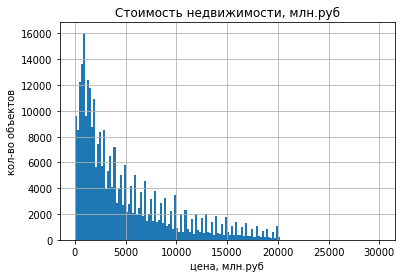

count    299228.000000
mean        115.847097
std         172.613493
min           0.000000
25%          75.000000
50%         108.000000
75%         144.000000
max       20000.000000
Name: Power, dtype: float64


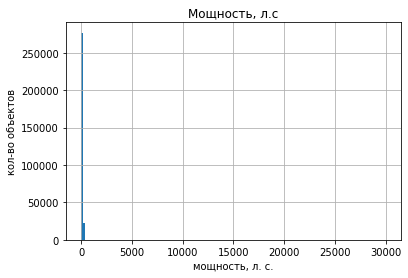

count    299228.000000
mean       2003.206892
std          24.504180
min        1000.000000
25%        1999.000000
50%        2003.000000
75%        2007.000000
max        9000.000000
Name: RegistrationYear, dtype: float64


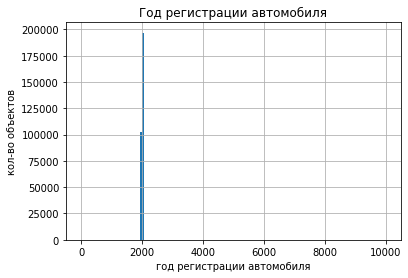

In [9]:
func_for_hist(data) #применим функцию func_for_hist

Изучив гистограммы, видим, что у нас есть редкие значения.

На гистограмме "Price" видим нулевые значения.

Далее на гистограмме "RegistrationYear" аномальные значения. Минимум 1000 и максимум 9000.

Также на гистограмме 'Power' есть выбросы.

Построим диаграммы размаха для определения границ.

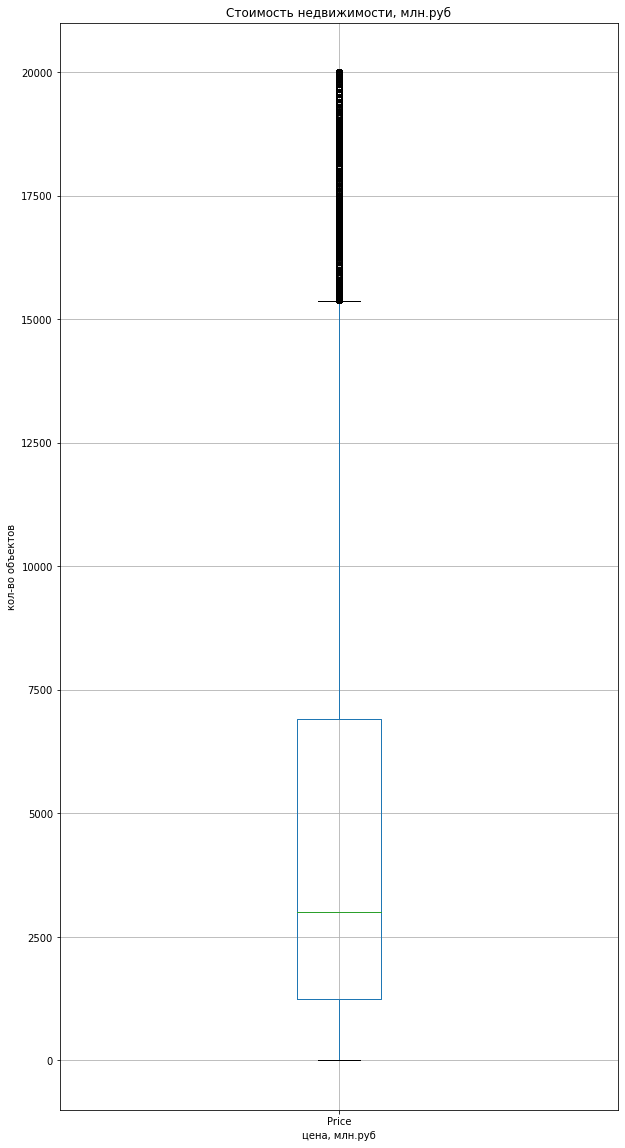

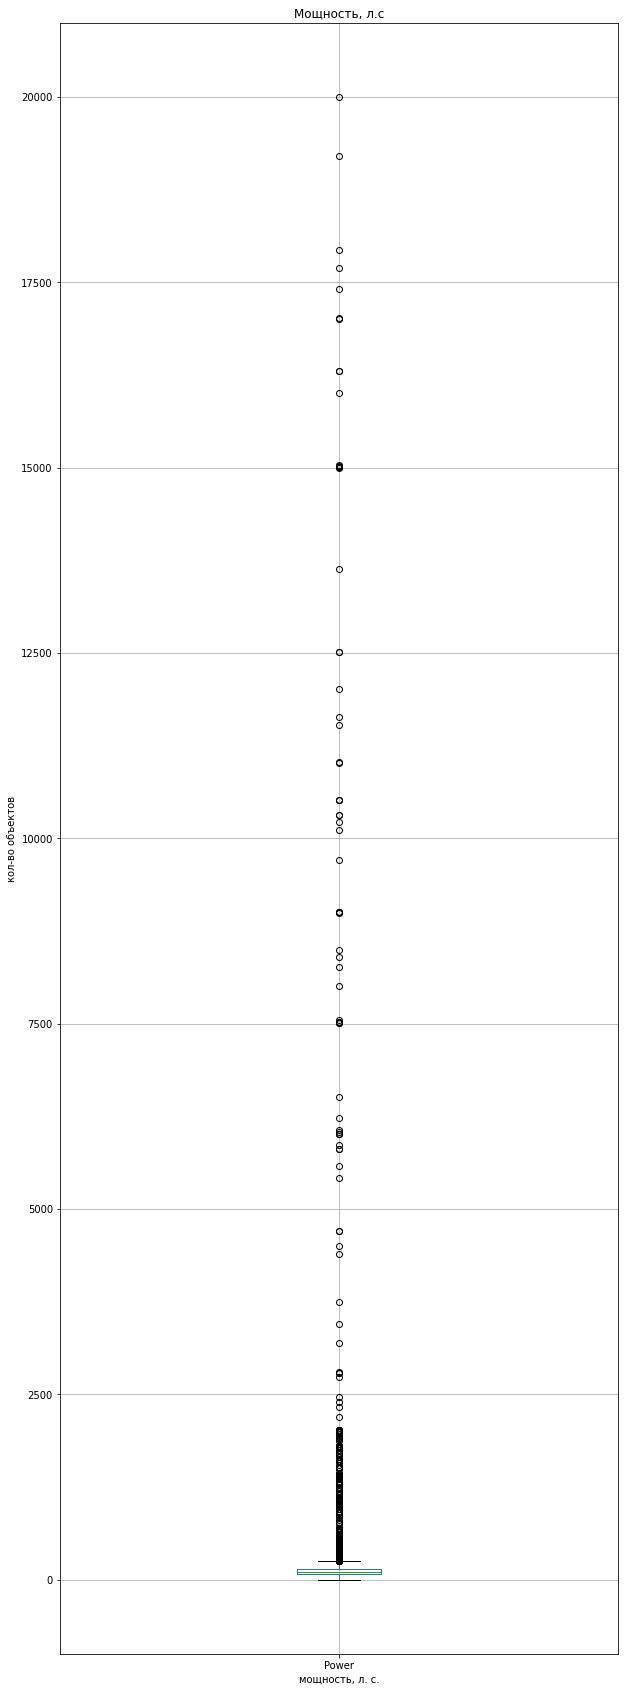

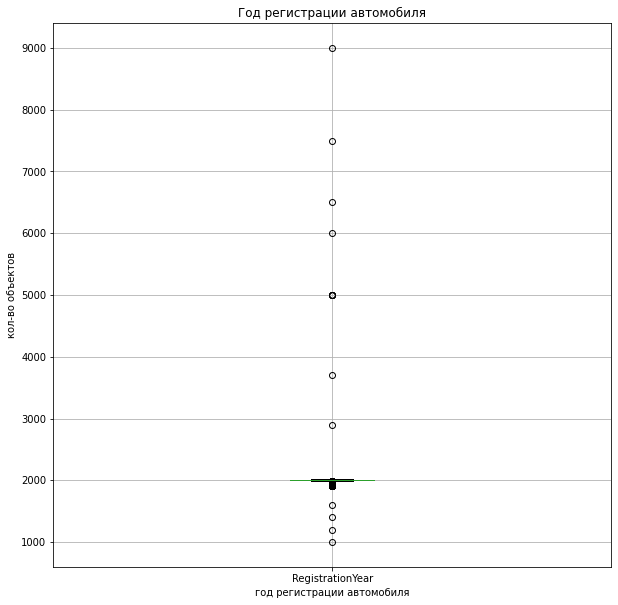

In [10]:
func_for_boxplot(data) #применим функцию func_for_boxplot

Price отбросим 0, Power верхняя граница 2500, RegistrationYear логичней взять от 1995 до 2022.

In [11]:
data = data.query('Price != 0 and Power <= 2500 and 1995 <= RegistrationYear <= 2022') #срез Price не равен 0, Power до 2500, RegistrationYear от 1995 до 2022

In [12]:
data.count() #посчитаем количество

Price                273882
VehicleType          273882
RegistrationYear     273882
Gearbox              273882
Power                273882
Model                273882
Kilometer            273882
RegistrationMonth    273882
FuelType             273882
Brand                273882
NotRepaired          273882
PostalCode           273882
dtype: int64

Проверим также данные на наличие дубликатов.

In [13]:
data.duplicated().sum() #посчитаем количество дубликатов

17833

In [14]:
columns = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand']
for column in columns:
    print(column + ":", data[column].unique()) #получим уникальные значения

VehicleType: ['suv' 'small' 'sedan' 'convertible' 'bus' 'wagon' 'coupe' 'other']
Gearbox: ['auto' 'manual']
Model: ['grand' 'golf' 'fabia' '3er' '2_reihe' 'c_max' '3_reihe' 'passat'
 'navara' 'twingo' 'a_klasse' 'scirocco' '5er' 'meriva' 'arosa' 'civic'
 'punto' 'e_klasse' 'clio' 'other' 'one' 'fortwo' '1er' 'b_klasse' 'astra'
 'a8' 'jetta' 'fiesta' 'c_klasse' 'micra' 'vito' 'sprinter' '156'
 'forester' 'xc_reihe' 'scenic' 'a4' 'a1' 'combo' 'focus' 'tt' 'a6' 'jazz'
 'transporter' 'polo' 'slk' '7er' 'corsa' '80' '147' 'z_reihe' 'sportage'
 'sorento' 'v40' 'ibiza' 'mustang' 'eos' 'touran' 'getz' 'insignia' 'ka'
 'almera' 'megane' 'a3' 'lupo' 'zafira' 'mondeo' 'colt' 'vectra'
 'berlingo' 'tiguan' 'i_reihe' 'sharan' '6_reihe' 'c4' 'panda' 'up'
 'seicento' 'ceed' 'kangoo' '5_reihe' 'yeti' 'octavia' 'mii' 'rx_reihe'
 'modus' 'fox' 'matiz' 'beetle' 'rio' 'touareg' 'logan' 'caddy' 'omega'
 'cuore' 's_max' 'a2' 'galaxy' 'c3' 'viano' 's_klasse' 'avensis'
 'roomster' 'santa' 'cooper' 'leon' 'a5' 

В столбце 'Model' есть неявные дубликаты - 'rangerover' и 'range_rover'.

In [15]:
data['Model'] = data['Model'].str.replace('rangerover', 'range_rover') #заменим

Удалим дубликаты.

In [16]:
data = data.drop_duplicates().reset_index(drop=True) #удалим дубликаты

### Кодирование данных

Для обучения моделей надо избавиться от категориальных признаков, но модель CatBoostRegressor сама кодирует признаки, так что сохраним копию данных в отдельную таблицу.

In [17]:
data_category = data.copy() #сохраним копию data в data_category

Для линейных моделей преобразуем категориальные признвки в численные, применением метода OHE, учитывая ловушку фиктивных признаков.

In [18]:
data_ohe = pd.get_dummies(data, drop_first=True, columns=['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']) #преобразуем категориальные признаки в столбцах 'VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired' в численные

Для моделей, основанных на деревьях решений, с помощью OrdinalEncoder кодируем категориальные признаки 'VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired'.

In [19]:
categorical_features = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired'] #выделим категориальные признаки

data[categorical_features] = OrdinalEncoder().fit_transform(data[categorical_features]) #кодируем

Проверим.

In [20]:
data

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,PostalCode
0,9800,6.0,2004,0.0,163,116.0,125000,8,2.0,14.0,1.0,90480
1,1500,5.0,2001,1.0,75,115.0,150000,6,6.0,37.0,0.0,91074
2,3600,5.0,2008,1.0,69,100.0,90000,7,2.0,31.0,0.0,60437
3,650,4.0,1995,1.0,102,10.0,150000,10,6.0,2.0,2.0,33775
4,2200,1.0,2004,1.0,109,7.0,150000,8,6.0,25.0,0.0,67112
...,...,...,...,...,...,...,...,...,...,...,...,...
256044,3999,7.0,2005,1.0,3,10.0,150000,5,2.0,2.0,0.0,81825
256045,3200,4.0,2004,1.0,225,139.0,150000,5,6.0,30.0,2.0,96465
256046,1199,1.0,2000,0.0,101,105.0,125000,3,6.0,32.0,0.0,26135
256047,9200,0.0,1996,1.0,102,220.0,150000,3,2.0,37.0,0.0,87439


In [21]:
data_ohe

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,PostalCode,VehicleType_convertible,VehicleType_coupe,VehicleType_other,VehicleType_sedan,...,Brand_skoda,Brand_smart,Brand_subaru,Brand_suzuki,Brand_toyota,Brand_trabant,Brand_volkswagen,Brand_volvo,NotRepaired_unknown,NotRepaired_yes
0,9800,2004,163,125000,8,90480,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1500,2001,75,150000,6,91074,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,3600,2008,69,90000,7,60437,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,650,1995,102,150000,10,33775,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,2200,2004,109,150000,8,67112,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256044,3999,2005,3,150000,5,81825,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
256045,3200,2004,225,150000,5,96465,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
256046,1199,2000,101,125000,3,26135,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
256047,9200,1996,102,150000,3,87439,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [22]:
data_category

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,PostalCode
0,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,unknown,90480
1,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,91074
2,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,60437
3,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,33775
4,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,67112
...,...,...,...,...,...,...,...,...,...,...,...,...
256044,3999,wagon,2005,manual,3,3er,150000,5,gasoline,bmw,no,81825
256045,3200,sedan,2004,manual,225,leon,150000,5,petrol,seat,yes,96465
256046,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,26135
256047,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,87439


###### Вывод

Заполнили пропущенные значения, удалили ненужные столбцы. Также сохранили копию таблицы для модели CatBoostRegressor и кодировали категориальные признаки для остальных моделей обучения.

## Обучение моделей

Выделим целевой признак Price и остальные признаки отдельно для data и data_category.

In [23]:
features = data.drop(['Price'], axis=1) #выделим признаки
target = data['Price'] #выделим целевой признак Price

features_cat = data_category.drop(['Price'], axis=1) #выделим признаки
target_cat = data_category['Price'] #выделим целевой признак Price

features_ohe = data_ohe.drop(['Price'], axis=1) #выделим признаки
target_ohe = data_ohe['Price'] #выделим целевой признак Price

Разделим данные на features_train и features_valid в соотношении 75 на 25, и также features_train_cat и features_valid_cat.

In [24]:
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345) #разделим данные на features_train и features_valid в соотношении 75 на 25

In [25]:
features_train_cat, features_valid_cat, target_train_cat, target_valid_cat = train_test_split(features_cat, target_cat, test_size=0.25, random_state=12345) #разделим данные на features_train и features_valid в соотношении 75 на 25

In [26]:
features_train_ohe, features_valid_ohe, target_train_ohe, target_valid_ohe = train_test_split(features_ohe, target_ohe, test_size=0.25, random_state=12345) #разделим данные на features_train и features_valid в соотношении 75 на 25

Напишем функцию для расчета времени выполнения обучения модели.

In [27]:
def getTimeModel(grid, features_train, target_train):
    start = time.time() #получим текущее время и запишем в переменную start
    grid.fit(features_train, target_train) #выполним обучение модели
    stop = time.time() #получим время после выполнения обучения и запишем в переменную stop
    total_time = stop - start #из stop вычтем start
    print('Время выполнения обучения модели', total_time) #выведем время выполнения обучения модели
    print('Лучшее значение метрики rmse:', -grid.best_score_) #выведем наилучший показатель
    print('Лучшие параметры:', grid.best_params_) #выведем наилучшие параметры
    return total_time, -grid.best_score_, grid.best_params_ #вернем время, метрику и наилучшие параметры

In [28]:
data_result = []
rmse = 0
best_params = {}

Обучим различные модели.

###### Модель дерева решений

In [29]:
parametres = {'max_depth': range(1, 20, 2)} #определим гиперпараметры

model_dt = DecisionTreeRegressor(random_state=12345)
search_cv = GridSearchCV(model_dt, parametres, scoring='neg_root_mean_squared_error', cv=5) #применим GridSearchCV для модели model_dt
total_time, rmse, best_params = getTimeModel(search_cv, features_train, target_train) #применим функцию getTimeModel

Время выполнения обучения модели 26.599849700927734
Лучшее значение метрики rmse: 1888.55227001559
Лучшие параметры: {'max_depth': 13}


Добавим полученные результаты в таблицу.

In [30]:
data_result.append(['DecisionTreeRegressor', total_time, rmse, best_params]) #добавим total_time, rmse, best_params в data_result

###### Модель линейной регрессии

In [31]:
start = time.time() #получим текущее время и запишем в переменную start

model_lr = LinearRegression()
cross_val = cross_val_score(model_lr, features_train_ohe, target_train_ohe, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=5, verbose=10) #применим cross_val_score для модели model_lr

stop = time.time() #получим время после выполнения обучения и запишем в переменную stop
total_time = stop - start #из stop вычтем start
print('Лучшее значение метрики rmse для модели линейной регрессии:', -cross_val.mean())

[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................ score: (test=-2577.378) total time=  45.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   45.2s remaining:    0.0s


[CV] END ............................ score: (test=-2574.125) total time=  44.0s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  1.5min remaining:    0.0s


[CV] END ............................ score: (test=-2593.540) total time=  26.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.9min remaining:    0.0s


[CV] END ............................ score: (test=-2572.316) total time=  27.0s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  2.4min remaining:    0.0s


[CV] END ............................ score: (test=-2595.760) total time=  45.1s
Лучшее значение метрики rmse для модели линейной регрессии: 2582.6238107919644


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.1min finished


Добавим полученные результаты в таблицу.

In [32]:
data_result.append(['LinearRegression', total_time, -cross_val.mean()]) #добавим total_time, -cross_val.mean() в data_result

###### Модель случайного леса

In [33]:
parametres = {'max_depth': range(1, 12, 2), #определим гиперпараметры
              'n_estimators': range(10, 15, 5)}

model_rf = RandomForestRegressor(random_state=12345)
r_search_cv = RandomizedSearchCV(model_rf, parametres, scoring='neg_root_mean_squared_error', cv=3) #применим RandomizedSearchCV для модели model_rf
total_time, rmse, best_params = getTimeModel(r_search_cv, features_train, target_train) #применим функцию getTimeModel

Время выполнения обучения модели 37.16268444061279
Лучшее значение метрики rmse: 1779.0016364628275
Лучшие параметры: {'n_estimators': 10, 'max_depth': 11}


Добавим полученные результаты в таблицу.

In [34]:
data_result.append(['RandomForestRegressor', total_time, rmse, best_params]) #добавим total_time, rmse, best_params в data_result

###### Модель LGBMRegressor

In [35]:
parametres = {'max_depth': range(1, 20, 2), #определим гиперпараметры
              'n_estimators': range(10, 20, 2)}

model_lgbm = LGBMRegressor(random_state=12345, learning_rate=1, n_jobs=-1)
grid_lgbm = GridSearchCV(model_lgbm, parametres, scoring='neg_root_mean_squared_error', cv=3, verbose=10) #применим GridSearchCV для модели model_lgbm
total_time, rmse, best_params = getTimeModel(grid_lgbm, features_train, target_train) #применим функцию getTimeModel

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV 1/3; 1/50] START max_depth=1, n_estimators=10...............................
[CV 1/3; 1/50] END .............max_depth=1, n_estimators=10; total time=   3.8s
[CV 2/3; 1/50] START max_depth=1, n_estimators=10...............................
[CV 2/3; 1/50] END .............max_depth=1, n_estimators=10; total time=   3.7s
[CV 3/3; 1/50] START max_depth=1, n_estimators=10...............................
[CV 3/3; 1/50] END .............max_depth=1, n_estimators=10; total time=   3.8s
[CV 1/3; 2/50] START max_depth=1, n_estimators=12...............................
[CV 1/3; 2/50] END .............max_depth=1, n_estimators=12; total time=   4.4s
[CV 2/3; 2/50] START max_depth=1, n_estimators=12...............................
[CV 2/3; 2/50] END .............max_depth=1, n_estimators=12; total time=   4.3s
[CV 3/3; 2/50] START max_depth=1, n_estimators=12...............................
[CV 3/3; 2/50] END .............max_depth=1, n_

Добавим полученные результаты в таблицу.

In [36]:
data_result.append(['LGBMRegressor', total_time, rmse, best_params]) #добавим total_time, rmse, best_params в data_result

###### Модель CatBoostRegressor

In [37]:
parametres = {'max_depth': range(1, 20, 2), #определим гиперпараметры
              'n_estimators': range(10, 20, 2)}

model_cbr = CatBoostRegressor(cat_features=categorical_features, random_state=12345, learning_rate=1)
grid_cbr = GridSearchCV(model_cbr, parametres, scoring='neg_root_mean_squared_error', cv=3) #применим GridSearchCV для модели model_cbr
total_time, rmse, best_params = getTimeModel(grid_cbr, features_train_cat, target_train_cat) #применим функцию getTimeModel

0:	learn: 3703.0912091	total: 86.7ms	remaining: 780ms
1:	learn: 3271.8539995	total: 105ms	remaining: 419ms
2:	learn: 3123.1217148	total: 138ms	remaining: 323ms
3:	learn: 2979.6538839	total: 165ms	remaining: 248ms
4:	learn: 2894.9073219	total: 183ms	remaining: 183ms
5:	learn: 2842.6297500	total: 203ms	remaining: 135ms
6:	learn: 2788.3074999	total: 224ms	remaining: 96ms
7:	learn: 2716.7053027	total: 242ms	remaining: 60.4ms
8:	learn: 2662.1374643	total: 261ms	remaining: 29ms
9:	learn: 2626.5096612	total: 279ms	remaining: 0us
0:	learn: 3694.5454547	total: 28.6ms	remaining: 257ms
1:	learn: 3267.1738554	total: 51.2ms	remaining: 205ms
2:	learn: 3115.0183404	total: 78.7ms	remaining: 184ms
3:	learn: 2969.1563124	total: 105ms	remaining: 157ms
4:	learn: 2885.2859959	total: 123ms	remaining: 123ms
5:	learn: 2832.7734938	total: 146ms	remaining: 97.4ms
6:	learn: 2778.8688286	total: 164ms	remaining: 70.4ms
7:	learn: 2706.6809296	total: 183ms	remaining: 45.7ms
8:	learn: 2645.7927003	total: 202ms	remain

Добавим полученные результаты в таблицу.

In [38]:
data_result.append(['CatBoostRegressor', total_time, rmse, best_params]) #добавим total_time, rmse, best_params в data_result

## Анализ моделей

Выведем таблицу с полученными результатами.

In [39]:
data_result = pd.DataFrame(data_result)

In [40]:
data_result.columns =['Модель', 'Время обучения', 'RMSE', 'Гиперпараметры']

In [41]:
data_result

,Модель,Время обучения,RMSE,Гиперпараметры
0,DecisionTreeRegressor,26.599850,1888.552270,{'max_depth': 13}
1,LinearRegression,187.769081,2582.623811,None
2,RandomForestRegressor,37.162684,1779.001636,"{'n_estimators': 10, 'max_depth': 11}"
3,LGBMRegressor,3277.833271,1747.340673,"{'max_depth': 9, 'n_estimators': 18}"
4,CatBoostRegressor,397.150395,1665.124315,"{'max_depth': 11, 'n_estimators': 18}"


###### Вывод

Наилучшее значение метрики rmse показывает модель CatBoostRegressor при max_depth равном 11 и n_estimators равном 18, при времени выполнения - 397 секунд.

## Общий вывод

Выполнены следующие этапы:

    Загрузка и подготовка данных.
    Обучение разных моделей. Для каждой подобраны различные гиперпараметры.
    Проанализированы скорость работы и качество моделей.
    
Исходя из качества и скорости предсказания, времени обучения, наилучшей моделью является модель CatBoostRegressor.